Lambda School Data Science

*Unit 4, Sprint 3, Module 3*

---

# Autoencoders

> An autoencoder is a type of artificial neural network used to learn efficient data codings in an unsupervised manner.[1][2] The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for dimensionality reduction, by training the network to ignore signal “noise”. Along with the reduction side, a reconstructing side is learnt, where the autoencoder tries to generate from the reduced encoding a representation as close as possible to its original input, hence its name. 

## Learning Objectives
*At the end of the lecture you should be to*:
* <a href="#p1">Part 1</a>: Describe the componenets of an autoencoder
* <a href="#p2">Part 2</a>: Train an autoencoder
* <a href="#p3">Part 3</a>: Apply an autoenocder to a basic information retrieval problem

__Problem:__ Is it possible to automatically represent an image as a fixed-sized vector even if it isn’t labeled?

__Solution:__ Use an autoencoder

Why do we need to represent an image as a fixed-sized vector do you ask? 

* __Information Retrieval__
    - [Reverse Image Search](https://en.wikipedia.org/wiki/Reverse_image_search)
    - [Recommendation Systems - Content Based Filtering](https://en.wikipedia.org/wiki/Recommender_system#Content-based_filtering)
* __Dimensionality Reduction__
    - [Feature Extraction](https://www.kaggle.com/c/vsb-power-line-fault-detection/discussion/78285)
    - [Manifold Learning](https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction)

We've already seen *representation learning* when we talked about word embedding modelings during our NLP week. Today we're going to achieve a similiar goal on images using *autoencoders*. An autoencoder is a neural network that is trained to attempt to copy its input to its output. Usually they are restricted in ways that allow them to copy only approximately. The model often learns useful properties of the data, because it is forced to prioritize which aspecs of the input should be copied. The properties of autoencoders have made them an important part of modern generative modeling approaches. Consider autoencoders a special case of feed-forward networks (the kind we've been studying); backpropagation and gradient descent still work. 

# Autoencoder Architecture (Learn)
<a id="p1"></a>

## Overview

The *encoder* compresses the input data and the *decoder* does the reverse to produce the uncompressed version of the data to create a reconstruction of the input as accurately as possible:

<img src='https://miro.medium.com/max/1400/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png' width=800/>

The learning process gis described simply as minimizing a loss function: 
$ L(x, g(f(x))) $

- $L$ is a loss function penalizing $g(f(x))$ for being dissimiliar from $x$ (such as mean squared error)
- $f$ is the encoder function
- $g$ is the decoder function

## Follow Along
### Extremely Simple Autoencoder

In [1]:
# Colab Only Cell
# Remember to Switch to GPU Runtime
%tensorflow__version 2.x

UsageError: Line magic function `%tensorflow__version` not found.


In [2]:
%load_ext tensorboard

In [5]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,)) #> have 784 values in mnist

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# input_img is input to this encoded function

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation="sigmoid")(encoded)
# Using sigmoid to normalize output to be between 0 to 1


# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [6]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [ ]:
# create a placeholder for an encoded (32-dimensional) input

# retrieve the last layer of the autoencoder model

# create the decoder model


In [11]:
### Compile

autoencoder.compile(optimizer='nadam', loss='binary_crossentropy')
# Want thr binary crossentropy of each pixel value

In [7]:
### Load mnist data

from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
### Normalize and reshape the data

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [12]:
import os

# stop = EarlyStopping(monitor=..., min_delta=0.001, patience=2)

# logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# tensorboard = Tensorboard(log_dir=logdir)

# Using x_train in both places because we are
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose = True)

Epoch 1/30
938/938 [==============================] - 4s 4ms/step - loss: 0.1897 - val_loss: 0.1313
Epoch 2/30
938/938 [==============================] - 4s 4ms/step - loss: 0.1180 - val_loss: 0.1070
Epoch 3/30
938/938 [==============================] - 4s 4ms/step - loss: 0.1029 - val_loss: 0.0978
Epoch 4/30
938/938 [==============================] - 4s 4ms/step - loss: 0.0973 - val_loss: 0.0956
Epoch 5/30
938/938 [==============================] - 4s 4ms/step - loss: 0.0955 - val_loss: 0.0937
Epoch 6/30
938/938 [==============================] - 4s 4ms/step - loss: 0.0947 - val_loss: 0.0931
Epoch 7/30
938/938 [==============================] - 4s 4ms/step - loss: 0.0943 - val_loss: 0.0929
Epoch 8/30
938/938 [==============================] - 4s 4ms/step - loss: 0.0940 - val_loss: 0.0925
Epoch 9/30
938/938 [==============================] - 4s 4ms/step - loss: 0.0938 - val_loss: 0.0926
Epoch 10/30
938/938 [==============================] - 4s 4ms/step - loss: 0.0936 - val_loss: 0.0923

In [13]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tensorboard --log_dir='./logs'

In [14]:
# encode and decode some digits
# note that we take them from the *test* set


# Make predictions on test set and visualize the reconstructed vs
# original images
decoded_imgs = autoencoder.predict(x_test)

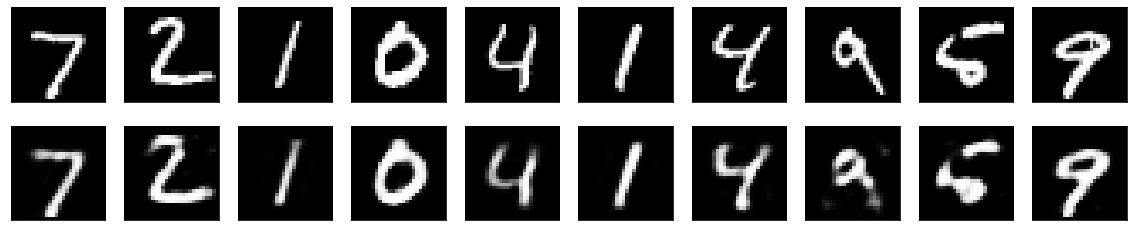

In [15]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Top row is the original
# Bottom row is the reconstructions

In [16]:
# Extract the encoded / compressed predictions

encoded_imgs = encoder.predict(x_test)

In [17]:
# 32 values we compressed to represent an image

encoded_imgs[0]

array([3.26012182e+00, 8.87422562e+00, 5.61425018e+00, 1.07183905e+01,
       7.48811245e+00, 3.75082588e+00, 9.91033268e+00, 7.24919081e+00,
       1.30667095e+01, 3.68575764e+00, 2.65579009e+00, 7.04854107e+00,
       7.39751148e+00, 4.74693441e+00, 9.66581059e+00, 8.22752380e+00,
       3.32378149e+00, 1.09179840e+01, 3.59326601e-03, 1.32648182e+00,
       1.03471899e+01, 5.15096092e+00, 7.86934853e+00, 7.35623598e+00,
       1.07077579e+01, 8.46558380e+00, 8.29886627e+00, 7.59930038e+00,
       4.25743246e+00, 4.68599701e+00, 4.37583733e+00, 2.09307384e+00],
      dtype=float32)

## Challenge

Expected to talk about the components of autoencoder and their purpose. 

# Train an Autoencoder (Learn)
<a id="p2"></a>

## Overview

As long as our architecture maintains an hourglass shape, we can continue to add layers and create a deeper network. 

## Follow Along

### Deep Autoencoder

In [19]:
input_img = Input(shape=(784,))


encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [21]:
# compile & fit model

# Input and output of the data in functional api compile

### LOOK INTO THIS!!!: >>> mc = ModelCheckpoint() MODEL CHECKPOINTS TO GGL DRV###

autoencoder = Model(input_img, decoded)

autoencoder.compile(loss='binary_crossentropy', optimizer='nadam')

autoencoder.fit(x_train, x_train,
                epochs = 30,
                shuffle=True,
                validation_data=(x_test, x_test))

# Looking to beat .0928

Epoch 1/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1533 - val_loss: 0.1172
Epoch 2/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1112 - val_loss: 0.1027
Epoch 3/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1012 - val_loss: 0.0965
Epoch 4/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0957 - val_loss: 0.0925
Epoch 5/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0922 - val_loss: 0.0896
Epoch 6/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0898 - val_loss: 0.0882
Epoch 7/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0880 - val_loss: 0.0863
Epoch 8/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0866 - val_loss: 0.0850
Epoch 9/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0855 - val_loss: 0.0843
Epoch 10/30
1875/1875 [==============================] - 10s 6ms/step - l

In [22]:
decoded_imgs = autoencoder.predict(x_test)

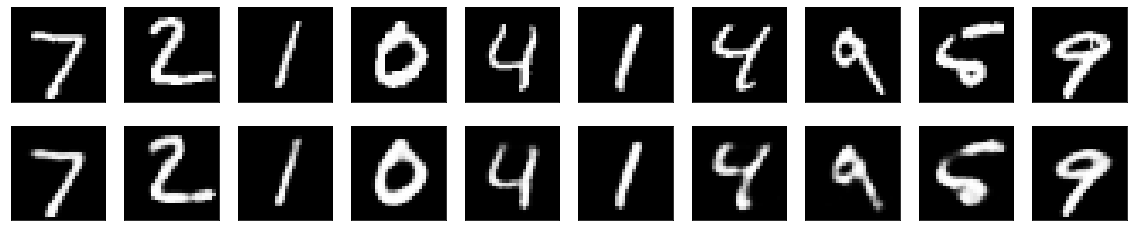

In [23]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Convolutional autoencoder

> Since our inputs are images, it makes sense to use convolutional neural networks (convnets) as encoders and decoders. In practical settings, autoencoders applied to images are always convolutional autoencoders --they simply perform much better.

> Let's implement one. The encoder will consist in a stack of Conv2D and MaxPooling2D layers (max pooling being used for spatial down-sampling), while the decoder will consist in a stack of Conv2D and UpSampling2D layers.

In [24]:
# from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
# from keras.models import Model
# from keras import backend as K

# # Create Model 

# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
#from keras import backend as K
# Create Model 
input_img = Input(shape=(28,28,1))
x = Conv2D(16,(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional representation

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='nadam', loss='binary_crossentropy')

In [25]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0   

In [26]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

Using TensorFlow backend.


In [28]:
import os

# stop = EarlyStopping(monitor=..., min_delta=0.001, patience=2)

# logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# tensorboard = Tensorboard(log_dir=logdir)

autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test, x_test)
                )

Epoch 1/30
938/938 [==============================] - 11s 12ms/step - loss: 0.1800 - val_loss: 0.1416
Epoch 2/30
938/938 [==============================] - 10s 11ms/step - loss: 0.1333 - val_loss: 0.1303
Epoch 3/30
938/938 [==============================] - 10s 10ms/step - loss: 0.1216 - val_loss: 0.1184
Epoch 4/30
938/938 [==============================] - 10s 10ms/step - loss: 0.1149 - val_loss: 0.1110
Epoch 5/30
938/938 [==============================] - 10s 10ms/step - loss: 0.1105 - val_loss: 0.1067
Epoch 6/30
938/938 [==============================] - 10s 11ms/step - loss: 0.1073 - val_loss: 0.1045
Epoch 7/30
938/938 [==============================] - 11s 12ms/step - loss: 0.1047 - val_loss: 0.1026
Epoch 8/30
938/938 [==============================] - 11s 12ms/step - loss: 0.1027 - val_loss: 0.0998
Epoch 9/30
938/938 [==============================] - 11s 12ms/step - loss: 0.1010 - val_loss: 0.0984
Epoch 10/30
938/938 [==============================] - 11s 12ms/step - loss: 0.099

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### Visualization of the Representations

In [ ]:
encoder = Model(input_img, encoded)
encoder.predict(x_train)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Challenge

You will train an autoencoder at some point in the near future. 

# Information Retrieval with Autoencoders (Learn)
<a id="p3"></a>

## Overview

A common usecase for autoencoders is for reverse image search. Let's try to draw an image and see what's most similiar in our dataset. 

To accomplish this we will need to slice our autoendoer in half to extract our reduced features. :) 

## Follow Along

In [ ]:
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_train)

In [ ]:
encoded_imgs[0].T

In [ ]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
nn.fit(encoded_imgs)

In [ ]:
nn.kneighbors(...)

## Challenge

You should already be familiar with KNN and similarity queries, so the key component of this section is know what to 'slice' from your autoencoder (the encoder) to extract features from your data. 

# Review

* <a href="#p1">Part 1</a>: Describe the componenets of an autoencoder
    - Enocder
    - Decoder
* <a href="#p2">Part 2</a>: Train an autoencoder
    - Can do in Keras Easily
    - Can use a variety of architectures
    - Architectures must follow hourglass shape
* <a href="#p3">Part 3</a>: Apply an autoenocder to a basic information retrieval problem
    - Extract just the encoder to use for various tasks
    - AE ares good for dimensionality reduction, reverse image search, and may more things. 


# Sources

__References__
- [Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)
- [Deep Learning Cookbook](http://shop.oreilly.com/product/0636920097471.do)

__Additional Material__